**Need of Employee Attrition prediction**

1. **Managing workforce**: If the supervisors or HR came to know about some employees that they will be planning to leave the company then they could get in touch with those employees which can help them to stay back or they can manage the workforce by hiring the new alternative of those employees.


2. **Smooth pipeline**: If all the employees in the current project are working continuously on a project then the pipeline of that project will be smooth but if suppose one efficient asset of the project(employee) suddenly leave that company then the workflow will be not so smooth.


3. **Hiring Management**: If HR of one particular project came to know about the employee who is willing to leave the company then he/she can manage the number of hiring and they can get the valuable asset whenever they need so for the efficient flow of work.

# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
## Reading the dataset
attrdata = pd.read_csv("./data/data.csv")

In [3]:
attrdata.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left
0,1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,27.12,Direct,Non Promoted,Yes,Left
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay


# DATA EXPLORATION

In [4]:
attrdata.value_counts()

table id  name   phone number  Location    Emp. Group  Function   Gender   Tenure  Tenure Grp.  Experience (YY.MM)  Marital Status  Age in YY.  Hiring Source  Promoted/Non Promoted  Job Role Match  Stay/Left
1         sid    9876544345    Pune        B2          Operation  Male     0.00    < =1         6.08                Single          27.12       Direct         Non Promoted           Yes             Left         1
2         sid    9876544345    Noida       B7          Support    Male     0.00    < =1         13.00               Marr.           38.08       Direct         Promoted               No              Stay         1
3         sid    9876544345    Bangalore   B3          Operation  Male     0.01    < =1         16.05               Marr.           36.04       Direct         Promoted               Yes             Stay         1
4         sid    9876544345    Noida       B2          Operation  Male     0.01    < =1         6.06                Marr.           32.07       Direct   

In [5]:
attrdata.shape

(902, 16)

In [6]:
attrdata.describe()

,table id,phone number,Tenure,Experience (YY.MM),Age in YY.
count,902.000000,9.020000e+02,902.000000,898.000000,902.000000
mean,451.500000,9.876544e+09,1.198293,5.150457,29.055288
std,260.529269,0.000000e+00,0.823203,3.483456,4.499554
min,1.000000,9.876544e+09,0.000000,0.030000,21.050000
25%,226.250000,9.876544e+09,0.110000,2.100000,26.050000
50%,451.500000,9.876544e+09,1.060000,4.110000,28.060000
75%,676.750000,9.876544e+09,2.040000,7.027500,31.070000
max,902.000000,9.876544e+09,3.000000,25.080000,52.060000


#### Droping index column since both index and table_id does the same job


In [23]:
attrdata.reset_index(drop=True, inplace=True)
# Drop the index column if it is not needed
attrdata.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left
0,1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,27.12,Direct,Non Promoted,Yes,Left
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay


In [24]:
attrdata.isnull().sum()

table id                 0
name                     0
phone number             0
Location                 0
Emp. Group               0
Function                 0
Gender                   0
Tenure                   0
Tenure Grp.              0
Experience (YY.MM)       0
Marital Status           0
Age in YY.               0
Hiring Source            0
Promoted/Non Promoted    0
Job Role Match           0
Stay/Left                0
dtype: int64

In [25]:
attrdata.shape

(896, 16)

In [26]:
mask = attrdata['Experience (YY.MM)'].isnull() & attrdata['Job Role Match'].isnull()
num_rows = mask.sum()
print(f"Number of rows with null values in both 'Experience (YY.MM)' and 'Job Role Match': {num_rows}")

Number of rows with null values in both 'Experience (YY.MM)' and 'Job Role Match': 0


So , there are 6 rows which are having null values , lets remove them

In [27]:
attrdata.dropna(axis=0,inplace=True)
attrdata.shape

(896, 16)

**Let’s explore all the categorical values and visualize them**

Now, we will use the **value_counts** function so that we can get the **unique values** from every **categorical type of data.**

**Gender**

In [28]:
gender_counts = attrdata['Gender '].value_counts()
gender_counts

Gender 
Male      656
Female    234
other       6
Name: count, dtype: int64

**Understanding the balancing of the Gender column visually**

<Axes: title={'center': 'Count of different gender'}, xlabel='Gender '>

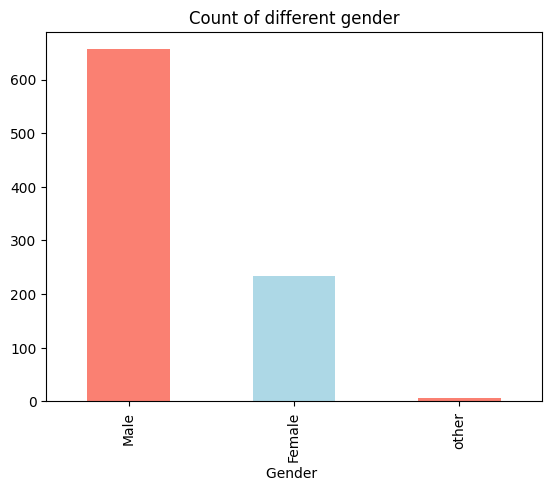

In [29]:
attrdata['Gender '].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Count of different gender")

Here, from the chart, it’s visible that the count of males is more than another category of the gender.

**Now, let’s figure out that how gender could be the reason for employees to leave the company or to stay in.**

(array([0, 1, 2]),
 [Text(0, 0, 'Female'), Text(1, 0, 'Male'), Text(2, 0, 'other')])

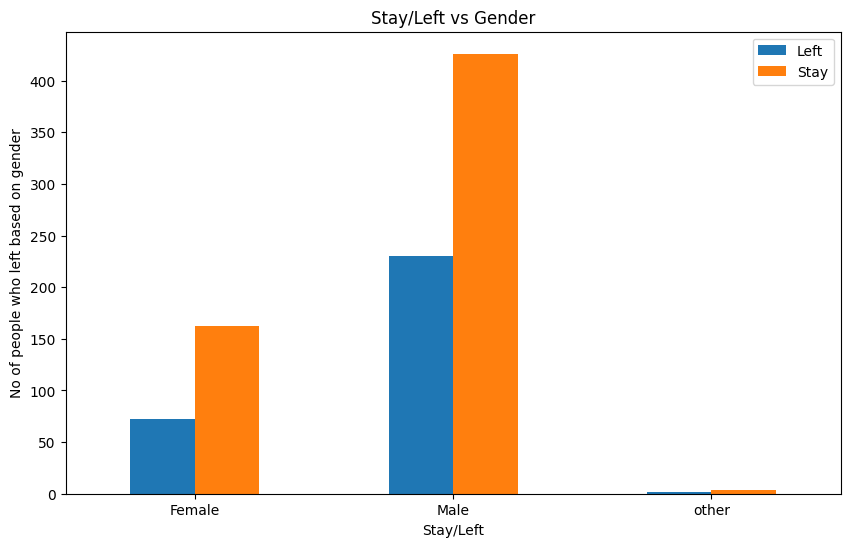

In [30]:
#Create a plot for crosstab

pd.crosstab(attrdata['Gender '],attrdata['Stay/Left']).plot(kind="bar",figsize=(10,6))
plt.title("Stay/Left vs Gender")
plt.xlabel("Stay/Left")
plt.ylabel("No of people who left based on gender")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

Here, from the chart it’s visible that it heavily depends on males, also we can see that it’s either male, female or others but more number of them are staying in the company.


**Promotion (Promoted/ Non-Promoted)**

In [31]:
promoted_dict = attrdata["Promoted/Non Promoted"].value_counts()
promoted_dict

Promoted/Non Promoted
Promoted        457
Non Promoted    439
Name: count, dtype: int64

<Axes: title={'center': 'Promoted and Non Promoted'}, xlabel='Promoted/Non Promoted'>

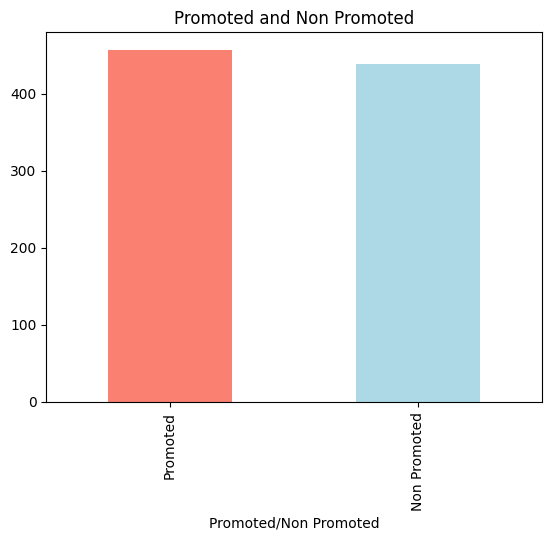

In [32]:
attrdata['Promoted/Non Promoted'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Promoted and Non Promoted")

Now, from the above chart, we can see that when it comes to Promoted and Non-Promoted employees it’s quiet in balanced number.

**Now, let’s figure out that how promotion could be the reason for employees to leave the company or to stay in.**

(array([0, 1]), [Text(0, 0, 'Non Promoted'), Text(1, 0, 'Promoted')])

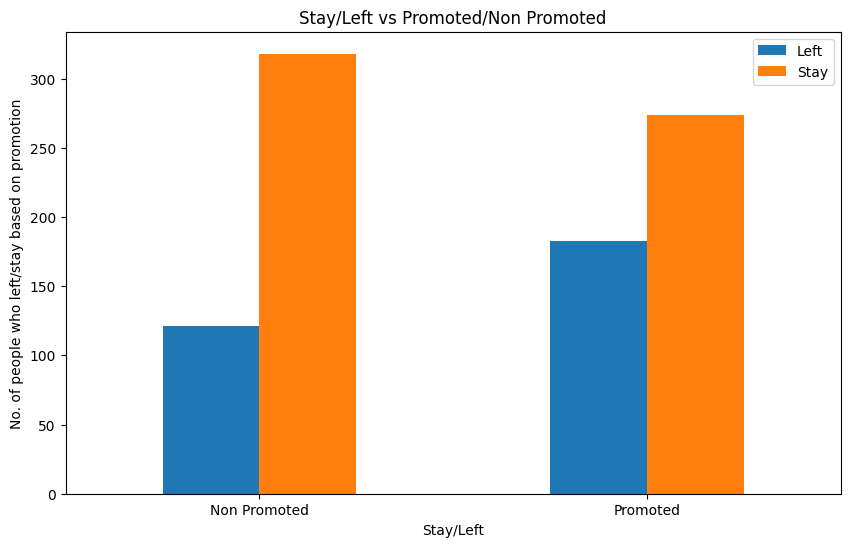

In [33]:
#Create a plot for crosstab

pd.crosstab(attrdata['Promoted/Non Promoted'],attrdata['Stay/Left']).plot(kind="bar",figsize=(10,6))
plt.title("Stay/Left vs Promoted/Non Promoted")
plt.xlabel("Stay/Left")
plt.ylabel("No. of people who left/stay based on promotion")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

Here, from the chart, it’s visible that the ones who are not promoted are leaving the company more as compared to the ones who are promoted which is also an obvious thing likely to happen.

**Function (Operation/ Support/ Sales)**

In [34]:
func_dict = attrdata["Function"].value_counts()
func_dict

Function
Operation    832
Support       52
Sales         12
Name: count, dtype: int64

<Axes: title={'center': 'Functions in organization'}, xlabel='Function'>

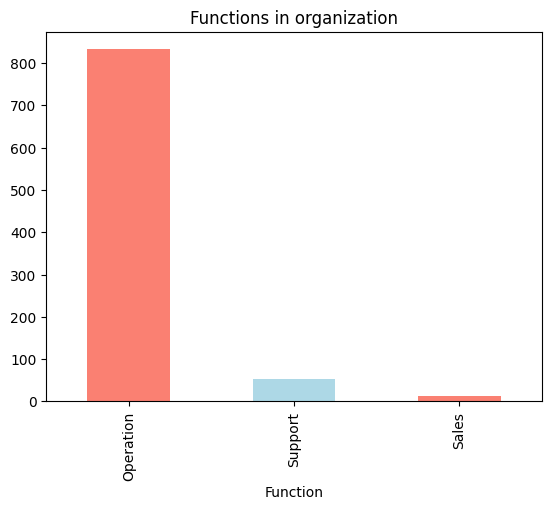

In [35]:
attrdata['Function'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Functions in organization")

Now, we can see that majority of the function performed by employees are Operation itself then support and at the last it’s sales.

**Now, let’s figure out that how function could be the reason for employees to leave the company or to stay in.**

(array([0, 1, 2]),
 [Text(0, 0, 'Operation'), Text(1, 0, 'Sales'), Text(2, 0, 'Support')])

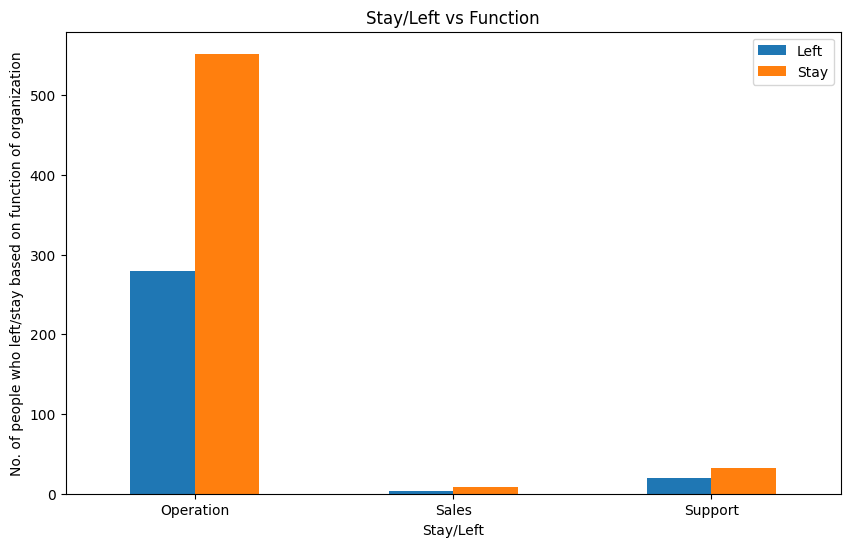

In [36]:
#Create a plot for crosstab

pd.crosstab(attrdata['Function'],attrdata['Stay/Left']).plot(kind="bar",figsize=(10,6))
plt.title("Stay/Left vs Function")
plt.xlabel("Stay/Left")
plt.ylabel("No. of people who left/stay based on function of organization")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

Here, in the chart, we can see that the maximum number of employees are in the operation section and a high number of employees in the same section are staying in the company.

**Hiring (Direct/ Agency/ Employee referral)**

In [37]:
Hiring_dict = attrdata["Hiring Source"].value_counts()
Hiring_dict

Hiring Source
Direct               709
Agency               116
Employee Referral     71
Name: count, dtype: int64

**Marital Status (Single/ Married/ Seperated/ Div./ NTBD)**

In [38]:
Marital_dict = attrdata["Marital Status"].value_counts()
print(Marital_dict)

Marital Status
Single    534
Marr.     356
Div.        2
NTBD        2
Sep.        2
Name: count, dtype: int64


**Employee Group**

In [40]:
Emp_Group_dict = attrdata["Emp. Group"].value_counts()
Emp_Group_dict["other group"] = 1
print(Emp_Group_dict)

Emp. Group
B1             537
B2             276
B3              59
B0               8
B4               7
B5               4
B7               2
B6               1
C3               1
D2               1
other group      1
Name: count, dtype: int64


**Job role match (Yes/ No)**

In [41]:
job_dict = attrdata["Job Role Match"].value_counts()
job_dict

Job Role Match
Yes    481
No     415
Name: count, dtype: int64

Now, we can see that majority of the employees have their correct role in Job.

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

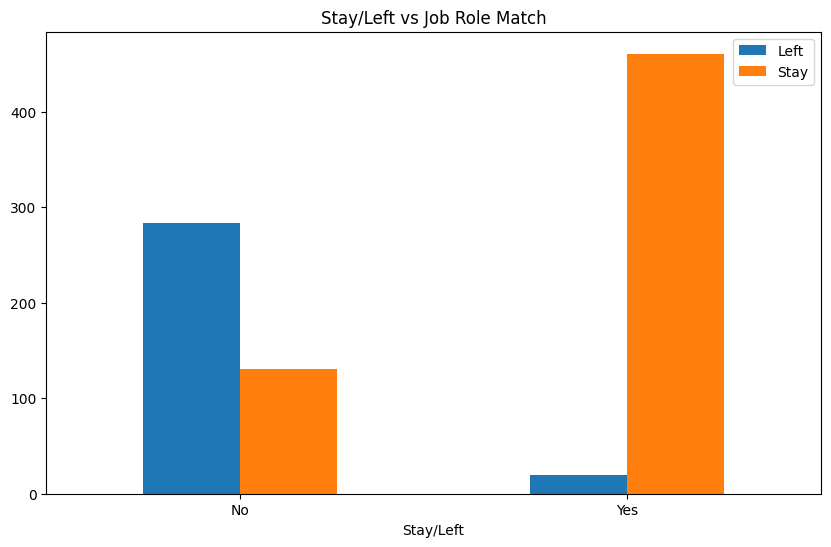

In [42]:
#Create a plot for crosstab

pd.crosstab(attrdata['Job Role Match'],attrdata['Stay/Left']).plot(kind="bar",figsize=(10,6))
plt.title("Stay/Left vs Job Role Match")
plt.xlabel("Stay/Left")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

Here, in the above chart, we can see that the number of employees who got the correct job role is staying in the company rather than the ones who don’t have their right job role.

**Tenure group**

In [43]:
tenure_dict = attrdata["Tenure Grp."].value_counts()
print(tenure_dict)

Tenure Grp.
> 1 & < =3    626
< =1          270
Name: count, dtype: int64


**Now let’s visualize some continuous data**

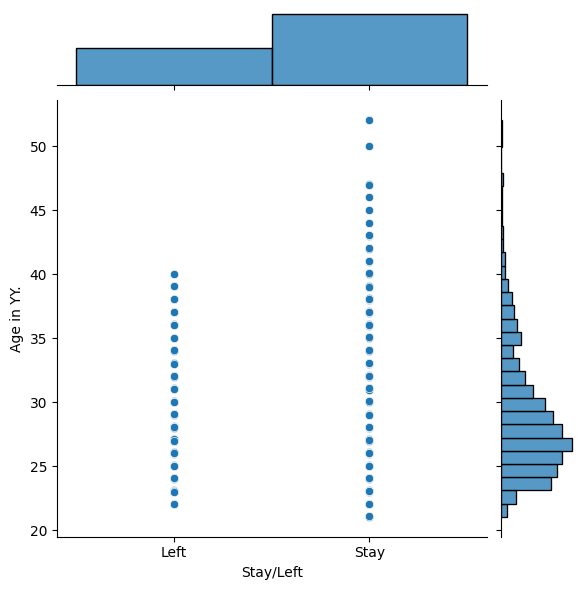

In [44]:
# Its Age vs stay/left
sns.jointplot(x='Stay/Left',y='Age in YY.',data=attrdata)

In the above graph, we can see that the ones who are having more age are staying back in the company rather than the ones who have comparatively less age.